<a href="https://colab.research.google.com/github/Tushar0745/Predictive-Analytics/blob/main/stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Topic : Predictive Analytics for Stock Market Trends**

**Import Required Libraries**

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Load the historical stock data**

In [15]:
# Download stock data for Apple (AAPL) from Yahoo Finance
data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")

/tmp/ipython-input-15-2279082001.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


**Data Preprocessing**

In [16]:
# Create a new column for the target variable (next day's closing price)
data['Tomorrow'] = data['Close'].shift(-1)

In [17]:
# Drop rows with missing values (due to shift)
data.dropna(inplace=True)

In [18]:
# Define features (independent variables)
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]

In [19]:
# Define target (dependent variable)
y = data['Tomorrow']

**Training and Testing the Data**

In [20]:
# Split data into 80% training and 20% testing, keep chronological order
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)

**Model Training**

In [21]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Make Prediction**

In [22]:
# Predict next-day closing prices on test data
predictions = model.predict(X_test)

**Model Evalution**

In [23]:
# Evaluate using Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Last Predicted Price: ${predictions[-1]:.2f}")

Mean Squared Error: 8.62
Last Predicted Price: $253.99


**Model Accurrcy**

In [24]:
# Calculate R² score for training and testing sets
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

# Print both scores
print("Model Accuracy:")
print(f"Training R² Score: {train_r2 * 100:.2f}%")
print(f"Testing R² Score: {test_r2 * 100:.2f}%")

Model Accuracy:
Training R² Score: 99.41%
Testing R² Score: 98.67%


**Visualization of Prediction**

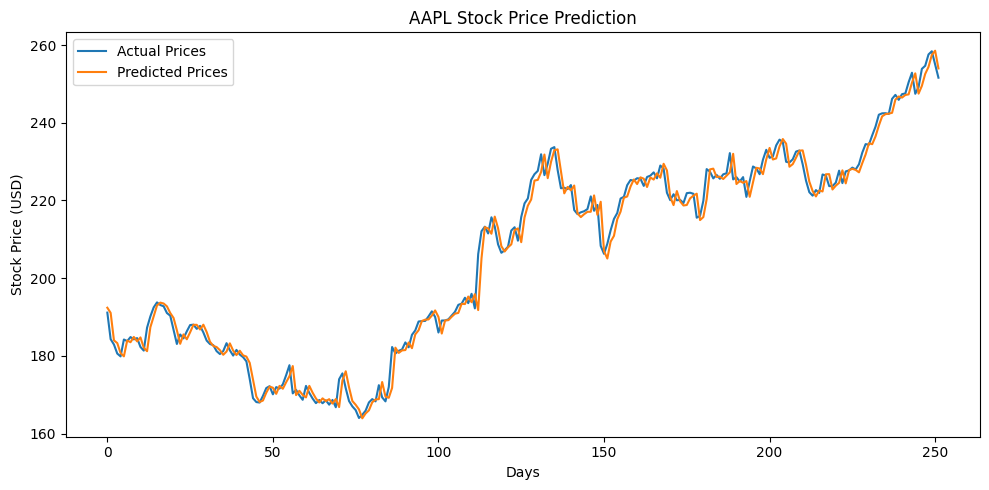

In [25]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.xlabel("Days")
plt.ylabel("Stock Price (USD)")
plt.title("AAPL Stock Price Prediction")
plt.legend()
plt.tight_layout()
plt.show()